In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
clean_folder='/content/drive/MyDrive/data/clean'
not_clean_folder='/content/drive/MyDrive/data/not_clean'
data_path='/content/drive/MyDrive/data'

###Load Data

In [5]:
data=tf.keras.utils.image_dataset_from_directory(
    directory=data_path,
    image_size=(128,128)
)

Found 614 files belonging to 2 classes.


In [6]:
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [7]:
data = data.map(normalize)


In [8]:
data_iterator=data.as_numpy_iterator()

In [9]:
batch=data_iterator.next()

In [10]:
batch[0]

array([[[[5.72991371e-01, 6.61155820e-01, 6.12972975e-01],
         [6.37507677e-01, 7.08036542e-01, 6.65603936e-01],
         [6.13758028e-01, 7.08030820e-01, 6.85661793e-01],
         ...,
         [5.56738257e-01, 6.78366244e-01, 6.86257303e-01],
         [5.24180472e-01, 6.46179914e-01, 6.57992482e-01],
         [5.36577046e-01, 6.71620309e-01, 6.89518213e-01]],

        [[5.74239790e-01, 6.72432244e-01, 6.34424806e-01],
         [5.27148426e-01, 5.99994242e-01, 5.50871253e-01],
         [5.99270463e-01, 6.82950377e-01, 6.88020825e-01],
         ...,
         [5.06826341e-01, 6.20408237e-01, 6.24329805e-01],
         [5.37063420e-01, 6.68901265e-01, 6.87503815e-01],
         [5.37676156e-01, 6.70578659e-01, 6.74796999e-01]],

        [[5.84643066e-01, 6.62584245e-01, 6.26537621e-01],
         [6.04302645e-01, 6.94749534e-01, 6.71710312e-01],
         [6.04369640e-01, 6.80646837e-01, 6.48339868e-01],
         ...,
         [5.29176235e-01, 6.42411530e-01, 6.49764478e-01],
         [

In [11]:
#Images
batch[0].min()

0.0

In [12]:
#Labels
batch[1]
len(batch[0])

32

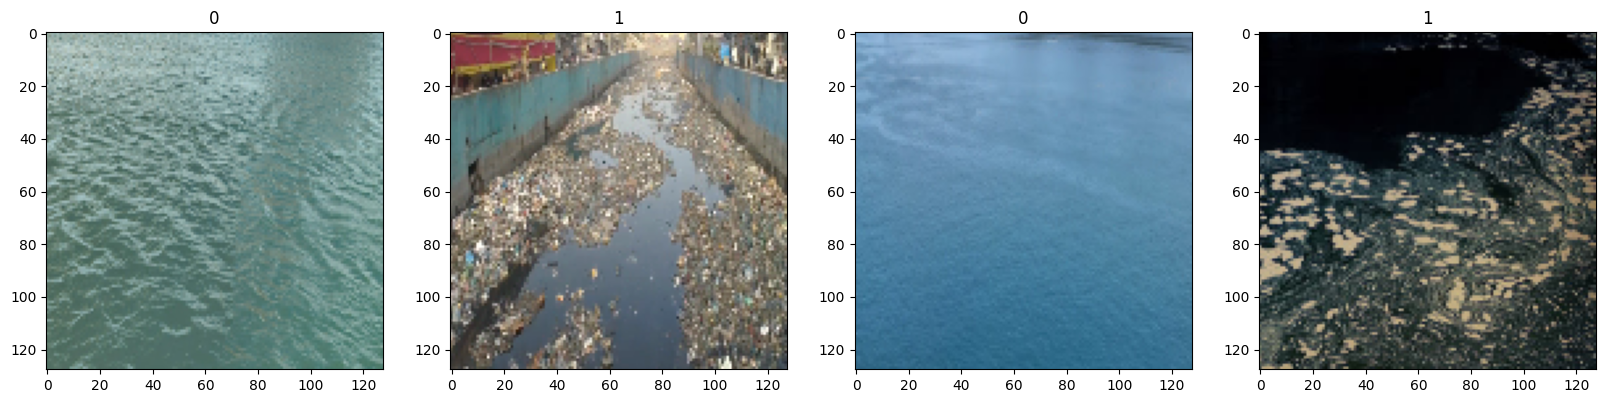

In [13]:
#Checking which class is assigned which label
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

# 0 is clean
# 1 is not clean

###Preprocessing data

##Scaling data
reduce each value from 0-255 to 0-1

add this code in the part above the creation of batch

In [14]:
# def normalize(image, label):
#     image = tf.cast(image, tf.float32) / 255.0
#     return image, label

# data = data.map(normalize)



##Split data
data will be divided into 3 parts => training data,validation data,test data

In [15]:
#The number of batches
len(data)

20

In [16]:
from sklearn.utils import class_weight
import numpy as np

In [17]:
train_size=int(len(data)*0.7)
val_size=int(len(data)*0.2)
test_size=int(len(data)*0.1)

In [18]:
test_size

2

In [19]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [20]:
all_labels=[]


for img,labels in train:
  all_labels.extend(labels.numpy())

all_labels=np.array(all_labels)


class_weights=class_weight.compute_class_weight('balanced',classes=[0,1],y=all_labels)

class_weights_dict={}

for i in range(len(class_weights)):
  class_weights_dict[i]=class_weights[i]

class_weights_dict


{0: 2.3092783505154637, 1: 0.6381766381766382}

##Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,AveragePooling2D

In [22]:
all_loss_values = []
all_val_loss_values = []
all_accuracy_values = []
all_val_accuracy_values = []

In [23]:
model= tf.keras.Sequential([
    Conv2D(16,(3,3),1,activation='relu',input_shape=(128,128,3)),
    MaxPooling2D((2,2)),
    Conv2D(16,(3,3),1,activation='relu'),
    AveragePooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(16,activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(train,epochs=10,validation_data=val,class_weight=class_weights_dict)
all_loss_values.extend(history.history['loss'])
all_val_loss_values.extend(history.history['val_loss'])
all_accuracy_values.extend(history.history['accuracy'])
all_val_accuracy_values.extend(history.history['val_accuracy'])

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.1960 - loss: 0.6766 - val_accuracy: 0.2578 - val_loss: 0.7412
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.2393 - loss: 0.6682 - val_accuracy: 0.2188 - val_loss: 0.7474
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.4054 - loss: 0.6046 - val_accuracy: 0.6250 - val_loss: 0.6429
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6398 - loss: 0.5662 - val_accuracy: 0.8750 - val_loss: 0.6125
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8062 - loss: 0.5205 - val_accuracy: 0.8750 - val_loss: 0.4999
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8960 - loss: 0.3943 - val_accuracy: 0.8672 - val_loss: 0.5223
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9266 - loss: 0.3333 - val_accuracy: 0.9219 - val_loss: 0.3457
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9096 - loss: 0.3292 - val_accuracy: 0.9375 - val_loss:

In [25]:
history=model.fit(train,epochs=2,validation_data=val)
all_loss_values.extend(history.history['loss'])
all_val_loss_values.extend(history.history['val_loss'])
all_accuracy_values.extend(history.history['accuracy'])
all_val_accuracy_values.extend(history.history['val_accuracy'])

Epoch 1/2
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9065 - loss: 0.2572 - val_accuracy: 0.9766 - val_loss: 0.1058
Epoch 2/2
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9625 - loss: 0.1324 - val_accuracy: 0.9609 - val_loss: 0.1051


In [26]:
history=model.fit(train,epochs=3,validation_data=val)
all_loss_values.extend(history.history['loss'])
all_val_loss_values.extend(history.history['val_loss'])
all_accuracy_values.extend(history.history['accuracy'])
all_val_accuracy_values.extend(history.history['val_accuracy'])

Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9505 - loss: 0.1314 - val_accuracy: 0.9531 - val_loss: 0.0834
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9645 - loss: 0.0835 - val_accuracy: 0.9609 - val_loss: 0.0921
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9302 - loss: 0.1984 - val_accuracy: 0.9453 - val_loss: 0.1090


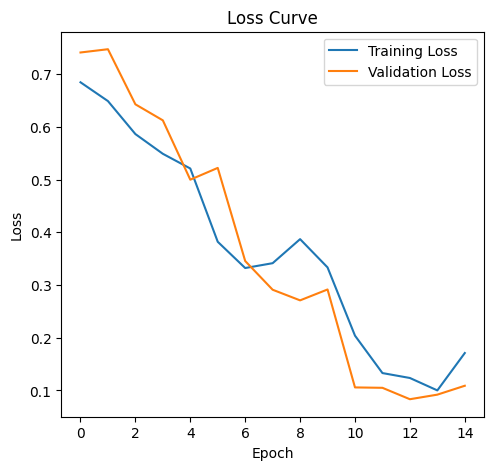

In [27]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(all_loss_values, label='Training Loss')
plt.plot(all_val_loss_values, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

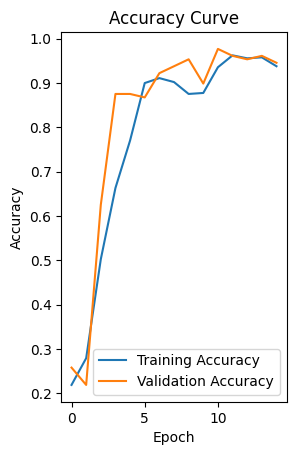

In [28]:
plt.subplot(1, 2, 2)
plt.plot(all_accuracy_values, label='Training Accuracy')
plt.plot(all_val_accuracy_values, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 854ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step


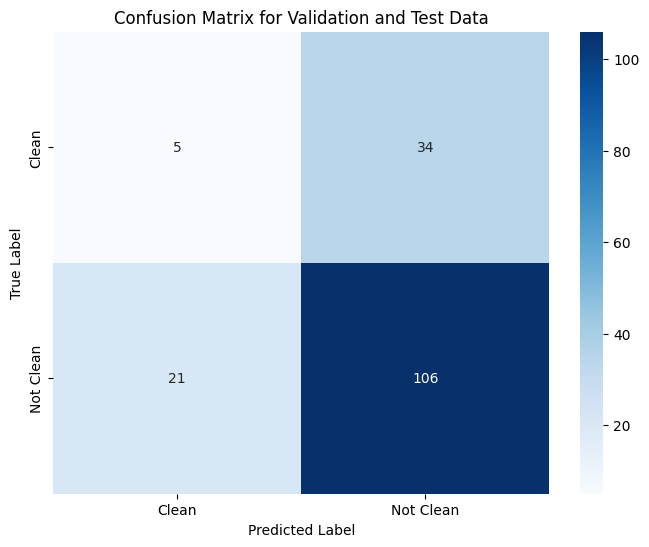

In [34]:
y_val_pred = model.predict(val)
y_val_pred_labels = (y_val_pred > 0.5).astype(int)

y_val_true = np.concatenate([y for x, y in val], axis=0)

y_test_pred = model.predict(test)
y_test_pred_labels = (y_test_pred > 0.5).astype(int)

y_test_true = np.concatenate([y for x, y in test], axis=0)

y_pred_labels_combined = np.concatenate([y_val_pred_labels, y_test_pred_labels], axis=0)
y_true_combined = np.concatenate([y_val_true, y_test_true], axis=0)

cm = confusion_matrix(y_true_combined, y_pred_labels_combined)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clean', 'Not Clean'], yticklabels=['Clean', 'Not Clean'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Validation and Test Data')
plt.show()

In [35]:
from sklearn.metrics import roc_curve, auc

2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 491ms/step


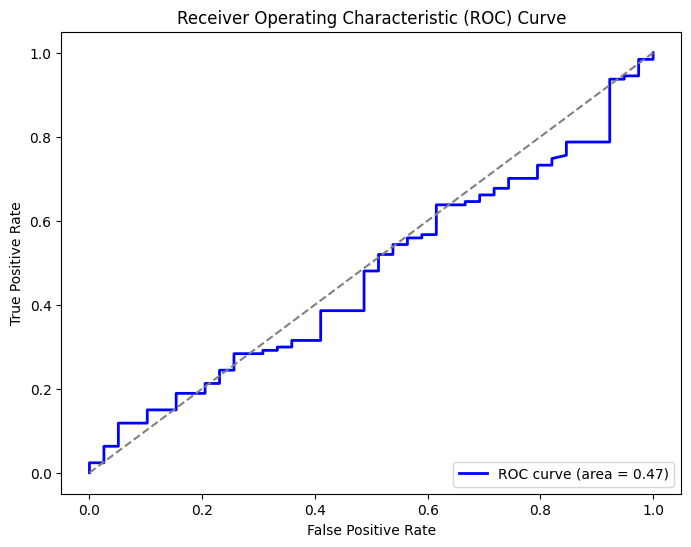

In [36]:
y_pred_proba_test = model.predict(test)

y_true_test = np.concatenate([y for x, y in test], axis=0)
y_pred_proba_test = np.concatenate(y_pred_proba_test, axis=0)

y_pred_proba_val = model.predict(val)

y_true_val = np.concatenate([y for x, y in val], axis=0)
y_pred_proba_val = np.concatenate(y_pred_proba_val, axis=0)

y_true=np.concatenate([y_true_test,y_true_val],axis=0)
y_pred_proba=np.concatenate([y_pred_proba_test,y_pred_proba_val],axis=0)

fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [38]:
model.save_weights('pristine_weights.weights.h5')
model.save("pristine.h5")

In [32]:
test_iterator=test.as_numpy_iterator()

In [33]:
test_batch=val_iterator.next()

In [ ]:
pred=model.predict(val_batch[0])
pred=tf.squeeze(pred)
pred,val_batch[1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


(<tf.Tensor: shape=(32,), dtype=float32, numpy=
 array([0.9935817 , 0.9437853 , 0.9870537 , 0.9997123 , 0.9518241 ,
        0.9758586 , 0.9915169 , 0.9932004 , 0.9986223 , 0.9856216 ,
        0.9844354 , 0.9963816 , 0.99312687, 0.00594519, 0.9927245 ,
        0.99729025, 0.99401236, 0.99488527, 0.522721  , 0.14200248,
        0.98991203, 0.9964401 , 0.99320936, 0.98556745, 0.00872675,
        0.9064883 , 0.01190378, 0.9970041 , 0.00964413, 0.9982343 ,
        0.0240292 , 0.9858284 ], dtype=float32)>,
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int32))

In [ ]:
result=[]
for idx,img in enumerate(val_batch[0][::]):
  img_copy=img.copy()
  input=img_copy.reshape(1,128,128,3)
  y=model.predict(input)
  # ax[idx].imshow(img)
  rounded=y.round()
  if rounded==val_batch[1][idx]:
    suggestion="correct"
  else:
    suggestion="wrong"

  result.append(f'Label: {val_batch[1][idx]}, Pred: {y[0][0]:.5f},suggestion:{suggestion}')

for pred in result:
  print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━

In [ ]:
test_iterator=test.as_numpy_iterator()

In [ ]:
test_batch=test_iterator.next()

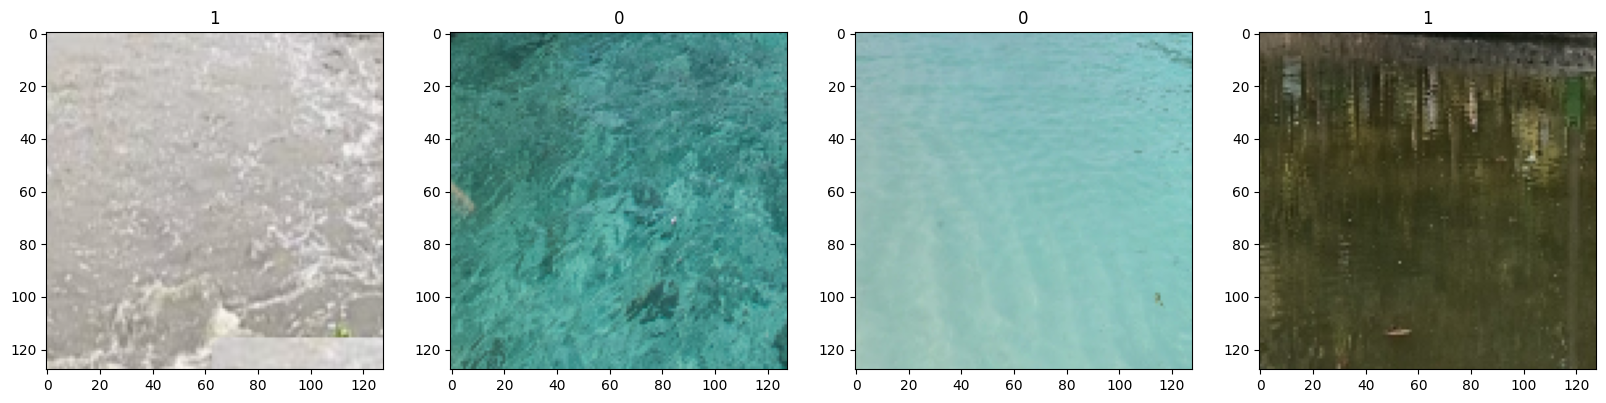

In [ ]:
# y=model.predict(test[0])
# plt.imshow(test[0])
# plt.show()

# if y>0.5:
#   print('unclean')
# else:
#   print('clean')


fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(test_batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(test_batch[1][idx])



In [ ]:
pred=model.predict(test_batch[0])
pred=tf.squeeze(pred)
pred,test_batch[1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


(<tf.Tensor: shape=(32,), dtype=float32, numpy=
 array([0.9586345 , 0.20092958, 0.06482735, 0.0106438 , 0.03341715,
        0.9946428 , 0.959088  , 0.02710997, 0.9853983 , 0.40660912,
        0.95640755, 0.9772733 , 0.91734207, 0.9407602 , 0.0314942 ,
        0.9903579 , 0.02052638, 0.9788837 , 0.9691318 , 0.9483884 ,
        0.03166867, 0.31295764, 0.9367263 , 0.9601746 , 0.94790626,
        0.9088284 , 0.93807954, 0.9860158 , 0.97110033, 0.92645615,
        0.00342513, 0.9482518 ], dtype=float32)>,
 array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int32))

In [ ]:



result=[]
for idx,img in enumerate(test_batch[0][::]):
  img_copy=img.copy()
  input=img_copy.reshape(1,128,128,3)
  y=model.predict(input)
  # ax[idx].imshow(img)
  rounded=y.round()
  if rounded==test_batch[1][idx]:
    suggestion="correct"
  else:
    suggestion="wrong"

  result.append(f'Label: {test_batch[1][idx]}, Pred: {y[0][0]:.5f},suggestion:{suggestion}')

for pred in result:
  print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Label: 1, Pred: 0.99888,suggestion:correct
Label: 1, Pred: 0.99434,suggestion:correct
Label: 1, Pred: 0.99259,suggestion:correct
Label: 0, Pred: 0.01252,suggestion:correct
Label: 1, Pred: 0.99019,suggestion:correct
Label: 0, Pred: 0.01446,suggestion:correct


In [ ]:
model.save('water_pred_03.h5')